# 一、实验准备

## 1、实验概述

广告作为市场营销的一个组成部分，发挥着不可替代的重要作用。随着经济的发展，广告传播在市场营销中不断影响着营销观念的变化，好的广告可以使企业更好地开发和利用营销资源，可以更好地满足和适应高速发展的经济全球化的需要。因此，科学地，深入地对分析广告投入对销售量的影响，构建销售预测模型极其重要。

## 2、实验目的

通过分析研究，构建更为合理的广告-销售预测模型，对于决策者了解广告对于销售的贡献程度，进行合理的广告投入已达到最大化广告效应的具有一定的指导意义。

## 3、实验建议

（1）掌握数据描述，  
（2）对数据进行简单分析和预处理  
（3）机器学习模型（尤其是分类相关的模型）构建  
（4）参数的简单调整  
（5）以及模型评价，  
（5）数据可视化等能力；

# 二、实验步骤

## 1、数据集描述

In [ ]:
本数据集共有200条数据，4个变量，其中TV, Radio, Newpaper为解释变量，被解释变量为Sales.

## 2、载入数据

查看当前工作路径

In [2]:
import os
os.chdir("C:\\Users\\zlw\\Documents\\SUFE\\上财课程\\大数据商业实战数据挖掘\\大数据商业实战\\大数据商业实战\\Python实战\\scikit-learn\\action\\regression\\")

In [6]:
%pwd

'C:\\Users\\zlw\\Documents\\SUFE\\上财课程\\大数据商业实战数据挖掘\\数据挖掘\\数据挖掘实战\\Python实战\\scikit-learn\\action\\regression'

python开发中经常遇到报错的情况，但是warning通常并不影响程序的运行，而且有时特别讨厌，我们采用如下代码控制警告错误的输出。

In [3]:
import warnings
warnings.filterwarnings('ignore')

通过pandas导入数据，导入数据之后，通过describe()方法，进行数据的基本查看：

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
advertise = pd.read_csv('advertise.csv')
print(advertise.describe().T)

           count      mean        std  min     25%     50%      75%    max
TV         200.0  147.0425  85.854236  0.7  74.375  149.75  218.825  296.4
Radio      200.0   23.2640  14.846809  0.0   9.975   22.90   36.525   49.6
Newspaper  200.0   30.5540  21.778621  0.3  12.750   25.75   45.100  114.0
Sales      200.0   14.0225   5.217457  1.6  10.375   12.90   17.400   27.0


In [3]:
type(advertise)

pandas.core.frame.DataFrame

In [8]:
print(advertise.head())
print(advertise.size)
print(advertise.shape)

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
800
(200, 4)


可以看到，数据的基本情况，一共有4列数值型数据，对于非数值型数据需要进行数值化处理。

## 3、数据观察

### 3.1 数据特征查看

In [5]:
advertise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


可以看到，数据一共有4列，不存在缺失数据

In [6]:
advertise.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [7]:
#### 数据读入
TV = advertise['TV']
Radio = advertise['Radio']
Newspaper = advertise['Newspaper']
y = advertise['Sales']
x = advertise[['TV', 'Radio', 'Newspaper']]
##x = advertise[['TV', 'Radio']]

### 3.2 绘制散点图观察数据

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

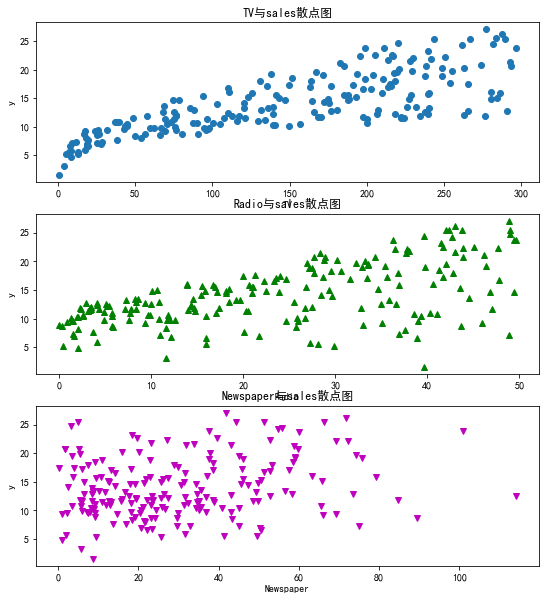

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,10))
plt.subplot(3,1,1)
plt.plot(TV, y, 'o')
plt.title('TV与sales散点图')
plt.xlabel('TV')
plt.ylabel('y')
plt.subplot(3,1,2)
plt.plot(Radio, y, 'g^')
plt.title('Radio与sales散点图')
plt.xlabel('Radio')
plt.ylabel('y')
plt.subplot(3,1,3)
plt.plot(Newspaper, y, 'mv')
plt.title('Newspaper与sales散点图')
plt.xlabel('Newspaper')
plt.ylabel('y')
plt.show()

Text(0.5,1,'TV与sales散点图')

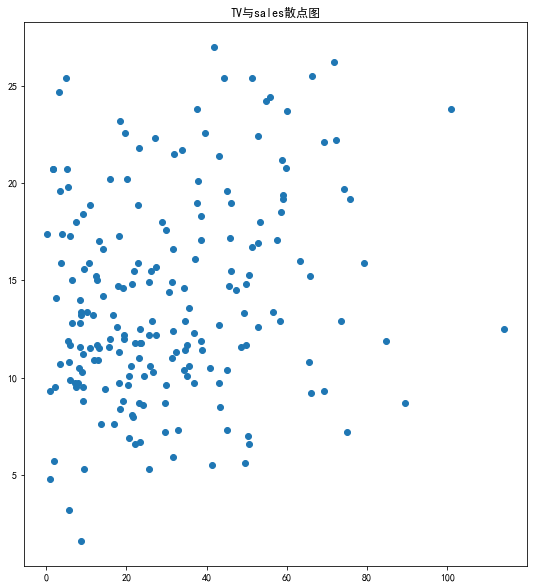

In [17]:
plt.figure(figsize=(9,10))
plt.plot(Newspaper, y, 'o')
plt.title('TV与sales散点图')

训练集，测试集拆分：X_train，y_train：得到的训练数据。X_test， y_test：得到的测试数据。random_state：随机数

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [25]:
#help(train_test_split)

In [38]:
x_train.head()

,TV,Radio,Newspaper
116,139.2,14.3,25.6
67,139.3,14.5,10.2
78,5.4,29.9,9.4
42,293.6,27.7,1.8
17,281.4,39.6,55.8


In [42]:
#x.shape
x_train.shape
x_train['TV']

(140,)

In [ ]:
from sklearn.linear_model import LinearRegression

### 3.3 建立模型

In [49]:
LR = LinearRegression()
model = LR.fit(x_train, y_train)
## 回归系数，即x的系数
print(LR.coef_)
## 截距项
print(LR.intercept_)

[0.04695205 0.17658644 0.00185115]
2.937215734690609


In [50]:
### mse结果如何
y_pred = LR.predict(np.array(x_test))
mse = np.average((y_pred - np.array(y_test)) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print(mse, rmse)

1.9289249074665729 1.3888574107756968


In [51]:
### 用sklearn中评价模型指标
y_pred1 = LR.predict(x_test)
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)
print(mse1, rmse1)

1.9289249074665729 1.3888574107756968


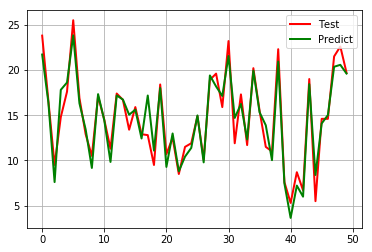

In [121]:
t = np.arange(len(x_test))
plt.plot(t, y_test, 'r-', linewidth=2, label='Test')
plt.plot(t, y_pred, 'g-', linewidth=2, label='Predict')
plt.legend(loc='upper right')
plt.grid()
plt.show()

### 4. 使用lasso或Ridge模型调参

In [1]:
# 自动调节alpha可以实现选择最佳的alpha。
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

In [53]:
help(Lasso)

Help on class Lasso in module sklearn.linear_model.coordinate_descent:

class Lasso(ElasticNet)
 |  Linear Model trained with L1 prior as regularizer (aka the Lasso)
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Technically the Lasso model is optimizing the same objective function as
 |  the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, optional
 |      Constant that multiplies the L1 term. Defaults to 1.0.
 |      ``alpha = 0`` is equivalent to an ordinary least square, solved
 |      by the :class:`LinearRegression` object. For numerical
 |      reasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.
 |      Given this, you should use the :class:`LinearRegression` object.
 |  
 |  fit_intercept : boolean
 |      whether to calculate the intercept for this model. If set
 |     

In [142]:
model = Lasso()
#model = Ridge()

In [134]:
model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [143]:
alpha_can = np.logspace(-3, 2, 10)
lasso_model = GridSearchCV(model, param_grid={'alpha': alpha_can}, cv=5)
lasso_model.fit(x_train, y_train)
print('验证参数：\n', lasso_model.best_params_)

验证参数：
 {'alpha': 0.001}


In [144]:
y_pred = lasso_model.predict(np.array(x_test))
lasso_mse = np.average((y_pred - np.array(y_test)) ** 2)  # Mean Squared Error
lasso_rmse = np.sqrt(lasso_mse)  # Root Mean Squared Error
print(lasso_mse, lasso_rmse)

1.9730457106647625 1.4046514552246627


In [149]:
print(mse, rmse)

1.9730456202283368 1.404651423032895
